<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 4 / SPRINT 1 / NOTE 3*

---

# Deep Learning for sequence data

* 텍스트에서 특성을 추출하고 문서 분류기를 만들 수 있습니다
* 잠재의미분석(Latent Semantic Analysis,LSA)을 수행합니다
* Spacy 단어 임베딩을 사용합니다

### Warm up

skipgram CBOW와 딥러닝


---

## 문서를 벡터로 만들기 위해 단어 임베딩을 사용해 봅시다

### BoW와 달리 Word2Vec과 같은 단어 임베딩 방법은 문맥(context)정보를 보존합니다

BoW는 단어의 존재 여부와 그 빈도 정보를 중요하게 다루는 대신 단어의 순서 정보를 무시하여 단어 주변 문맥정보를 잃어버린다는 단점이 있습니다.

이와 달리 단어 임베딩 방법중 하나인 Word2Vec은 문장에서 인접한 단어들의 정보를 중요시 하여 벡터화할 때 문맥 정보를 보존합니다. 그래서 의미적 또는 구조적으로 비슷한 사용법을 가진 단어들을 알 수 있게 됩니다.

#### *임베딩이란?*
자연어를 컴퓨터가 이해할 수 있는 수의 나열인 벡터 형태로 바꾸는 과정 또는 결과를 의미합니다. 앞서 살펴본 BoW 방법들은 문서를 벡터화 한 것이라 볼 수 있습니다. 

### Word2Vec 이란?
Word2Vec은 구글 연구팀이 발표한(Mikolov et al., 2013) 기법으로 가장 널리 쓰이는 단어 임베딩 모델 중 한 가지 입니다. 단어 임베딩 방법으로는 skip-gram과 CBOW 두 모델이 제안되었습니다. 

#### 분포가설(Distributional Hypothesis)

Word2Vec이 어떻게 문맥 정보를 보존하는지 이해하려면 분포가설([Distributional Hypothesis](https://en.wikipedia.org/wiki/Distributional_semantics))을 알아야 합니다. 
분포가설은 비슷한 문맥에서 등장하는 단어들은 비슷한 의미를 지닌다는 것 입니다. 여기서 분포(distribution)란 특정 윈도우(window) 범위 안에 동시에 등장하는 이웃 단어나 문맥의 집합을 말합니다. 

예를 들어 두 문장

- I found **good** stores.
- I found **bad** stores.

에서 **good**과 **bad**은 주변에 분포한 문맥 단어들이 매우 유사함으로 추축하건데 비슷한 의미를 지닐 것이다 라고 가정하는 것 입니다.

> "You shall know a word by the company it keeps" - John Firth

### Word2Vec을 구현하는 방법으로 Skip-Gram을 살펴보겠습니다

CBOW, Skip-Gram은 Word2Vec을 구현하는 두 가지 방법입니다.

<img src="https://www.researchgate.net/publication/304163783/figure/fig11/AS:668313973698561@1536349876279/Neural-Network-Architecture-for-CBoW-and-Skip-Gram-Model.ppm"/>

여기서는 Skip-Gram만 살펴 보겠습니다

<img src="http://mccormickml.com/assets/word2vec/skip_gram_net_arch.png" width="800" />

위 그림은 Skip-Gram 신경망 모식도 입니다.([Word2Vec Tutorial - The Skip-Gram Model](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/))

입력으로 원핫인코딩된 단어벡터가 들어오고 출력부분에서는 입력단어와 다른 모든 단어들이 문맥 단어일 확률값을 계산하게 됩니다.

신경망 학습을 위해서는 학습데이터를 구성하는 방법이 중요한데,

Skip-Gram 모델은 만들어진 학습데이터에서 타겟단어를 입력받아 주변 단어를 예측하는 과정에서 학습이 됩니다.


예를 들어서 **"The tortoise jumped into the lake"** 라는 문장이 있고 윈도우 크기가 2인 경우 다음과 같이 skip-Gram을 학습하기 위한 데이터 쌍을 구축할 수 있습니다.

* 타겟: **The**, 주변 문맥단어: tortoise, jumped
    * 학습 샘플: (the, tortoise), (the, jumped)
* 타겟: **tortoise**, 주변 문맥단어: tortoise, jumped
    * 학습 샘플: (tortoise, the), (tortoise, jumped), (tortoise, into)
* 타겟: **jumped**, 주변 문맥단어: tortoise, jumped
    * 학습 샘플: (jumped, the), (jumped, tortoise), (jumped, into), (jumped, the)
* 타겟: **into**, 주변 문맥단어: tortoise, jumped
    * 학습 샘플: (into, tortoise), (into, jumped), (into, the), (into, lake)
                    ...

이런 방법으로 학습 데이터를 만들면 다음과 같은 데이터쌍이 만들어 집니다. 타겟단어를 입력으로, 문맥단어를 레이블로 하여 classification 학습을 진행한다고 생각하시면 됩니다. 전체 코퍼스에서 단어별로 슬라이딩하여 가능한 학습데이터를 모두 생성하고 신경망을 학습합니다.

|타겟단어|문맥단어|
|---------|---------|
|the|tortoise|
|the|jumped|
|tortoise|the|
|tortoise|jumped|
|tortoise|into|
|jumped|the|
|jumped|tortoise|
|jumped|into|
|jumped|the|
|into|tortoise|
|into|jumped|
|into|the|
|into|lake|
|...|...|

학습이 다 끝난 후 은닉층의 가중치가 임베딩벡터의 차원이 됩니다. 은닉층의 노드 수를 조절하여 임베딩벡터의 차원을 조절할 수 있겠지요.
<img src="https://i.imgur.com/1ETMljf.png" width="600" />

학습과정에서 효율을 높이기 위해 사용하는 기법들이 있지만 지금은 아직 신경망을 배우기 전이기 때문에 너무 깊게 들어가지 않겠습니다.

결과적으로 skip-gram 모델을 통해 결과로 단어 임베딩 벡터들을 얻게되어 단어, 문장들 간의 관련도 계산, 문서 분류같은 작업에 사용될 수 있습니다.

CountVectorizer, TF-IDF을 사용할 때 문맥정보를 보기위해 할 수 있는 최선의 방법은 bi-gram, tri-grams 같은 n-gram을 사용하는 것이었습니다. 하지만 skip-grams은 그 이상을 넘어 보다 강력한 문맥 정보를 제공해 줄 수 있습니다.


#### CBOW(Continuous Bag of Words)

Word2Vec을 구현하는 방법 중 CBOW는 skip-gram과 반대로 주변에 있는 문맥단어들을 가지고 타겟 단어 하나를 맞추는 과정을 통해 학습이 이루어 집니다.
예를 들어 입력이 (jumped, the, lake) 일 때 타겟 단어로 'into' 를 예측하며 학습을 합니다.  

하지만 Skip-gram이 같은 코퍼스를 사용했을 때 더 많은 학습 데이터를 만들어 낼 수 있기 때문에 임베딩 결과의 품질이 CBOW 보다 좋은 것으로 알려져 있습니다.



#### 그럼 임베딩 모델 학습은 어떻게 해야 할까요?
Word2Vec을 학습시키기 위해서는 충분히 큰 코퍼스를 학습시켜야 한다는 것을 알 수 있습니다. 다행인 것은 이미 충분히 큰 코퍼스들로 학습된 단어 임베딩을 쉽게 찾아 사용할 수 있다는 것입니다. 여러분이 지금까지 사용해온 Spacy 라이브러리의 모델도 Word2Vec 와 유사한 방식으로 학습한 임베딩을 제공합니다. 무지막지하게 큰 [Common Crawl](https://en.wikipedia.org/wiki/Common_Crawl) 데이터를 학습에 사용해 만든 모델이기 때문에 영어의 경우 충분히 대표성을 가진 임베딩이 나올 수 있을 것이라 생각할 수 있겠습니다.

이제 spacy를 통해 임베딩을 어떻게 사용하는지 살펴 봅시다.

In [ ]:
tokens = nlp("Dogs and cats school gagasdf")

# vector_norm: 벡터의 크기
for token in tokens:
    print(token.text, token.has_vector, token.vector_norm)

Dogs True 7.193099
and True 4.6577983
cats True 6.933004
school True 6.7380905
gagasdf False 0.0


입력한 문장에 대한 임베딩 벡터를 얻습니다.

In [ ]:
vects = tokens.vector
print(vects)

[-1.79408014e-01  1.26198798e-01 -1.11785397e-01 -2.83820003e-01
 -2.62799971e-02  5.58035970e-02 -1.45570010e-01 -5.27487993e-02
  1.69332191e-01  1.93045998e+00 -2.79807180e-01  1.38399795e-01
 -1.85558006e-01  5.02085984e-02 -1.40728995e-01  9.67558026e-02
  2.06080005e-01  8.19686055e-01 -1.57560199e-01 -6.11754060e-02
 -1.73499614e-01 -1.09055400e-01 -4.25813980e-02 -2.84800589e-01
  1.65506005e-01 -9.49792042e-02 -2.45875999e-01 -1.76592007e-01
  1.02721252e-01 -1.18426010e-01 -9.64230075e-02  2.92337183e-02
 -8.17720070e-02 -2.63900049e-02  2.31444001e-01  9.93599277e-03
  1.33631989e-01 -2.89353997e-01  8.05701874e-03  2.12559611e-01
  1.11464588e-02  1.04168795e-01  6.81307912e-03 -1.94971208e-02
  7.46979937e-02 -9.89580080e-02 -2.04918385e-01  1.74181998e-01
  1.38363212e-01 -1.74419403e-01 -8.65179971e-02 -2.17613988e-02
  1.88542008e-02  4.70872000e-02 -9.22998041e-02  2.23565191e-01
 -3.33181992e-02  6.36455938e-02 -2.20621794e-01  3.23160827e-01
  7.06618130e-02 -1.33299

In [ ]:
# 벡터의 차원을 보겠습니다
len(vects)

300

In [ ]:
# 두 문서를 만들어 코사인 유사도를 측정해 보겠습니다
doc1 = nlp("I found a wonderful restaurant")
doc2 = nlp("the food is delicious")

similarity = doc1.similarity(doc2)
print(similarity)

0.792971253536227


In [ ]:
doc3 = nlp("The restaurant we found yesterday is wonderful")

print(doc1.similarity(doc3))

0.9173849797280267


In [ ]:
car = nlp('car')
bus = nlp('bus')
human = nlp('human')
monkey = nlp('monkey')
lion = nlp('lion')
gorilla = nlp('gorilla')
avengers = nlp('avengers')
marvel = nlp('marvel')

print('car vs bus : ', car.similarity(bus))
print('bus vs human : ', bus.similarity(human))
print('human vs monkey : ', human.similarity(monkey))
print('human vs lion : ', human.similarity(lion))
print('monkey vs gorilla : ', monkey.similarity(gorilla))
print('avengers vs marvel : ', avengers.similarity(marvel))

car vs bus :  0.4816960149829203
bus vs human :  0.12412277316164501
human vs monkey :  0.39899946231157096
human vs lion :  0.27611871750909667
monkey vs gorilla :  0.6525881793034227
avengers vs marvel :  0.5988409089010447


### PCA를 사용한 벡터 시각화
300 차원인 벡터들은 시각화 하기 어렵기 때문에 PCA를 사용해 2차원으로 변환해 보겠습니다.

In [ ]:
from sklearn.decomposition import PCA

def get_word_vectors(words):
    # 단어 벡터로 변환합니다
    return [nlp(word).vector for word in words]

words = ['car', 'truck', 'suv', 'bus', 'human', 'man', 'woman', 'monkey', 'fish' , 'shark', 'lion', 'tiger', 'avengers', 'marvel', 'thor', 'comics', 'superhero']

# PCA 모델의 차원을 설정하여 
pca = PCA(n_components=2)

# Fit & Transform
word_vect_2d = pca.fit_transform(get_word_vectors(words))

# 각 벡터가 300 차원에서 2차원으로 줄어 든 것을 확인 할 수 있습니다
word_vect_2d

array([[-3.66200993, -3.32131749],
       [-3.546578  , -2.85085021],
       [-1.79310422, -3.71355107],
       [-3.06282644, -2.17552236],
       [-0.32817602,  1.3725565 ],
       [-1.07378983,  0.56357398],
       [-1.38479131,  0.34247838],
       [-0.32481679,  2.04812646],
       [-1.69068704,  3.8972493 ],
       [-0.79176752,  3.43002251],
       [-0.28481803,  2.75749512],
       [-0.77280682,  3.10963932],
       [ 4.97271183, -1.21201458],
       [ 2.90881958, -0.6911009 ],
       [ 3.43790293, -1.18524999],
       [ 3.76755523, -1.36028237],
       [ 3.62918236, -1.0112526 ]])

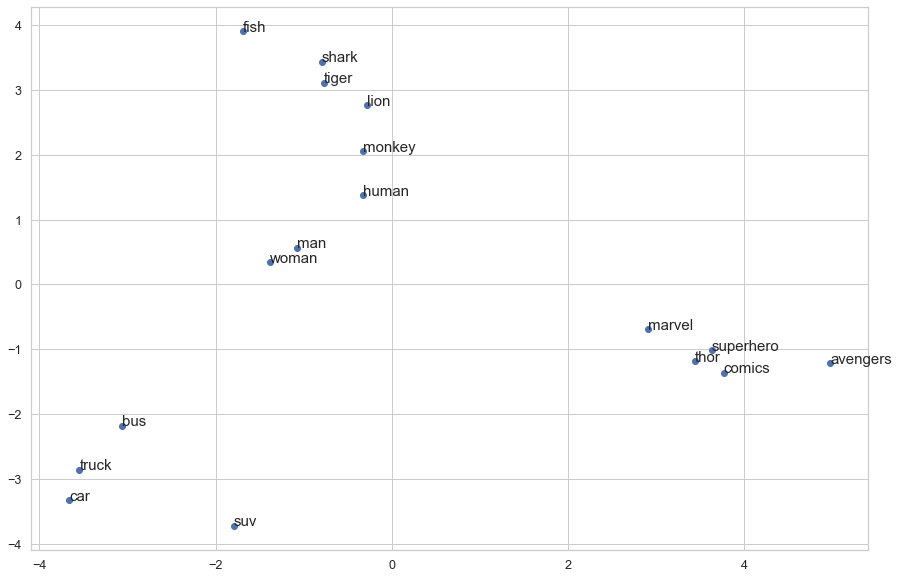

In [ ]:
# 결과가 잘 보이도록 크기를 설정합니다
plt.figure(figsize=(15,10))

# 단어벡터를 그립니다
plt.scatter(word_vect_2d[:,0], word_vect_2d[:,1])

# 점 옆에 단어를 표시합니다
for word, coord in zip(words, word_vect_2d):
    x, y = coord
    plt.text(x, y, word, size= 15)

plt.show()

In [ ]:
# 벡터 연산을 통해 단어간의 관계를 추론할 수 있습니다

from scipy.spatial.distance import cosine

king = nlp("king").vector
queen = nlp("queen").vector
man = nlp("man").vector
woman = nlp("woman").vector

# 단어벡터가 의미를 가진다면 다음과 같은 연산을 통해 result는 queen과 비슷한 뜻이 되겠지요?
result = king - man + woman

print("similarity between queen and (king - man + woman) : ", 1 - cosine(queen, result))

similarity between queen and (king - man + woman) :  0.7880843877792358


### 문서에서 벡터화 하여 KNN으로 검색해 보겠습니다.

Spacy를 사용해 문서를 임베딩 하겠습니다.

In [ ]:
X = [nlp(str(d)).vector for d in data]

In [ ]:
pd.DataFrame(X).shape

(401, 300)

단어 queen 과 가장 유사한 단어를 찾아 보겠습니다.

In [ ]:
import numpy as np
most_similar= nlp.vocab.vectors.most_similar(np.array([queen]), n=10)

In [ ]:
# return tuple: (keys, best_rows, scores)
most_similar

(array([[ 5247273317732208552,  4176741725343376093, 10168488388102651113,
         15897987006174384596,  6350019949300993244,  6861946004817705414,
         13176088972490086564,  7102492827649024548,  7464393751932445219,
         14826469074451677028]], dtype=uint64),
 array([[ 59856,   6026,   5310,  11962,  16454, 172357, 391588,  27270,
           3150,   2183]], dtype=int32),
 array([[1.    , 1.    , 1.    , 0.7322, 0.7322, 0.7322, 0.7253, 0.7253,
         0.7253, 0.7253]], dtype=float32))

In [ ]:
most_similar[0][0]

array([ 5247273317732208552,  4176741725343376093, 10168488388102651113,
       15897987006174384596,  6350019949300993244,  6861946004817705414,
       13176088972490086564,  7102492827649024548,  7464393751932445219,
       14826469074451677028], dtype=uint64)

In [ ]:
for key in most_similar[0][0]:
    print(nlp.vocab[key].text,)

QUEEN
queen
Queen
queens
Queens
QUEENS
KIng
KING
king
King


문서 임베딩 벡터로 NN 모델을 학습합니다.

In [ ]:
nn_spacy = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn_spacy.fit(X)

NearestNeighbors(algorithm='kd_tree')

Tfidf 벡터로 찾은 0번째 문서와 가장 유사한 문서 5개를 보겠습니다.

In [ ]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 0.        , 1.10314436, 1.12437104, 1.15991512]]),
 array([[  0,  62,  92, 297, 300]]))

Spacy 임베딩 모델로 찾아 봅시다.

In [ ]:
nn_spacy.kneighbors([X[0]])

(array([[0.        , 0.        , 0.49605979, 0.50772691, 0.50784463]]),
 array([[62,  0, 92, 83, 52]]))

문서62는 문서0과 동일하고 그 외, 문서 92를 가장 가깝다고 합니다.

In [ ]:
print(data[0][:150],'\n')
print(data[92][:150])

b"Mobiles rack up 20 years of use\n\nMobile phones in the UK are celebrating their 20th anniversary this weekend.\n\nBritain's first mobile phone call was m" 

b'Finding new homes for old phones\n\nRe-using old mobile phones is not just good for the environment, it has social benefits too.\n\nResearch has found tha'


In [ ]:
# spacy
print(data[83][:150])

b'Looks and music to drive mobiles\n\nMobile phones are still enjoying a boom time in sales, according to research from technology analysts Gartner.\n\nMore'


In [ ]:
# tfidf
print(data[297][:150])

b"'Friends fear' with lost mobiles\n\nPeople are becoming so dependent on their mobile phones that one in three are concerned that losing their phone woul"


지금까지 자연어를 벡터로 표현하는 방법들에 대해 살펴보았습니다. Bag-of-Words 모델 중 단어의 출현 빈도를 사용해 텍스트 문서를 벡터로 변환하는 CounterVectorizer를 사용해 보았고, 문서별 단어의 빈도를 계산해 가중치를 적용한 TfidfVectorizer를 사용해 보았습니다.

이렇게 변환된 벡터는 코사인 유사도와 같은 방법을 통해 문서들 간 유사성을 수치로 나타낼 수 있었습니다. 문서들이 많을 때 코사인 유사도를 다 적용해서 가장 가까운 문서를 찾는 방법은 효율적이지 않습니다. 그래서 K-NN과 같은 트리 기반 알고리즘을 사용해 가장 가까운 K개의 문서를 빠르게 검색할 수 있었습니다.

BoW는 단어의 존재와 빈도를 중요시 여기는 대신 단어들의 순서정보를 무시하여 주변 문맥 정보가 없어지는 단점이 있었습니다. Word2Vec과 같은 담어 임베딩 방법은 벡터 생성 과정 중에 문맥 정보를 보존하여 유사한 의미를 가진 단어나 문장은 는 유사도가 큰 벡터가 됩니다.

---

여러분은 이미 머신러닝을 이용해 분류기를 학습시킬 수 있습니다. 그리고 텍스트 문서에서 어떻게 특성들을 추출하는지 배웠습니다. 이제 텍스트 문서를 분류하는 모델을 만들 차례 입니다!

## 텍스트에서 특성들을 추출하고 문서 분류기를 만들어 보겠습니다.

Sklearn 파이프라인을 사용하면 머신러닝 프로세스에 사용되는 여러 컴포넌트들을 쉽게 연결할 수 있었습니다.

이번에는 파이프라인을 이용해 코퍼스 입력, 차원 축소, 학습 프로세스를 진행해 보겠습니다.

벡터화 과정중에 n-gram 범위, 최대 토큰의 수 같은 하이퍼파라미터들을 수정해 가며 실험을 해 보아야 합니다.

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

20개 뉴스그룹으로 분류된 18,000개의 뉴스그룹 문서 데이터셋 입니다.
- [20newsgroups](https://scikit-learn.org/stable/datasets/index.html#the-20-newsgroups-text-dataset)
- 전자와 정치에 관한 두 개의 다른 카테고리 뉴스를 가져오겠습니다.


In [10]:
categories = ['sci.electronics',
              'talk.politics.misc']

ng_train = fetch_20newsgroups(subset='train'
                             , remove=('headers', 'footers', 'quotes')
                             , categories=categories
                             )

ng_test = fetch_20newsgroups(subset='test'
                             , remove=('headers', 'footers', 'quotes')
                             , categories=categories
                             )

## Spacy 단어 임베딩을 사용합니다

In [2]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [3]:
doc = nlp("The tortoise jumped into the lake")

Spacy는 기본적으로 300차원으로 임베딩 합니다.

In [4]:
len(doc.vector)

96

In [5]:
def get_word_vectors(docs):
    return [nlp(doc).vector for doc in docs]

In [11]:
%%time
X_spacy = get_word_vectors(ng_train.data)

len(X_spacy) == len(ng_train.data)

CPU times: user 45.2 s, sys: 1.41 s, total: 46.6 s
Wall time: 46.7 s


In [12]:
%%time
X_test_spacy = get_word_vectors(ng_test.data)

CPU times: user 27.1 s, sys: 884 ms, total: 28 s
Wall time: 28.1 s


랜덤포레스트로 학습해 보겠습니다.

In [ ]:
rfc.fit(X_spacy, ng_train.target)

In [ ]:
y_test_spacy = rfc.predict(X_test_spacy)
accuracy_score(ng_test.target, y_test_spacy)

#### MLP(Multi-layer perceptron classifier)를 간단히 사용해보겠습니다

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs'
                   , alpha=1e-5
                   , hidden_layer_sizes=(16,2)
                   , random_state=2
                   )

In [ ]:
clf.fit(X_spacy, ng_train.target)

In [ ]:
clf.get_params()

In [ ]:
y_test = clf.predict(X_test_spacy)
accuracy_score(ng_test.target, y_test_spacy)

---


## 참고자료

#### Text Classification
- [Text Classification](https://developers.google.com/machine-learning/guides/text-classification)
- [Text Classification using scikit-learn](https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a)

#### SVD
- [특이값 분해(SVD)](https://angeloyeo.github.io/2019/08/01/SVD.html)
- [Singular Value Decomposition (the SVD)](https://youtu.be/mBcLRGuAFUk)
- [특이값 분해(Singular Value Decomposition, SVD)의 활용](https://darkpgmr.tistory.com/106)
- [Singular Value Decomposition (SVD) tutorial](https://web.mit.edu/be.400/www/SVD/Singular_Value_Decomposition.htm)
- [numpy 벡터와 행렬연산 참고자료](https://ebbnflow.tistory.com/159)
- [Image Compression with SVD](http://fourier.eng.hmc.edu/e161/lectures/svdcompression.html)
- [Latent semantic indexing](https://nlp.stanford.edu/IR-book/html/htmledition/latent-semantic-indexing-1.html)

